Milestone 1: Data Understanding & Exploration
- Load the diabetes dataset using scikit-learn and display the first five rows
- Perform descriptive statistics (mean, median, min, max) and summarize class balance
- Visualize the distributions of at least two features using histograms or box plots

In [20]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install joblib



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load Diabetes dataset
diabetes = load_diabetes(as_frame=True)
df_diabetes = diabetes.frame
print("\nDiabetes Dataset:")
print(df_diabetes.head())
df=df_diabetes.copy()



Diabetes Dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


Milestone 2: Data Preparation & Preprocessing
- Handle any missing values, duplicates, or outliers in the dataset
- Apply feature scaling/normalization
- Encode categorical variables (if present) with a suitable technique
- Perform basic correlation analysis and point out highly correlated features

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((353, 10), (89, 10))

Milestone 3: Model Selection & Training
- Split the dataset into training and test sets with a suitable ratio
- Choose and train at least two machine learning models (e.g., logistic regression, random forest)
- Include hyperparameter tuning with cross-validation for one chosen model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor().fit(X_train, y_train)

print("LR score:", lr.score(X_test, y_test))
print("RF score:", rf.score(X_test, y_test))



LR score: 0.45260276297191937
RF score: 0.4329059205211947


Milestone 4: Model Evaluation & Interpretation
- Evaluate the trained models with appropriate metrics (accuracy, ROC-AUC, precision, recall)
- Plot and interpret a confusion matrix for the best model

MSE: 3004.5504887640445
R2: 0.4329059205211947


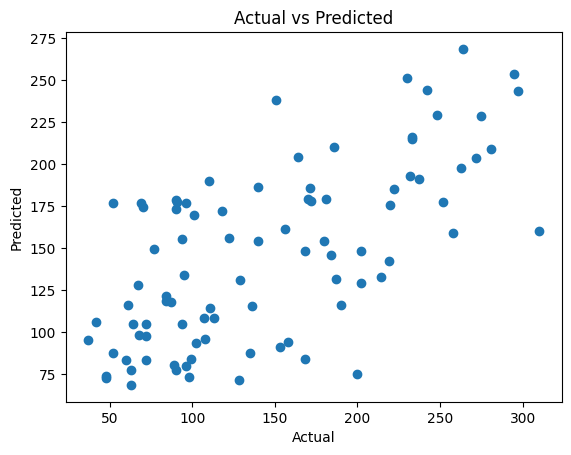

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

pred = rf.predict(X_test)
print("MSE:", mean_squared_error(y_test, pred))
print("R2:", r2_score(y_test, pred))

plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Milestone 5: Deployment & Reporting
- save your final trained model for later use
- load the model and making a new prediction

In [25]:
import joblib
joblib.dump(rf, 'mymodel.pkl')

# Load and predict
model = joblib.load('mymodel.pkl')
print(model.predict([X_test[0]]))

[142.06]
